<a href="https://colab.research.google.com/github/RMMalshaPiumini/Loan-Approval-Prediction/blob/main/copilot_helps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [29]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeRegressor

**Upload Dataset**

In [30]:
# Upload once, pick CSV file (e.g., loan_approval_data.csv)
uploaded = files.upload()                         # choose .csv
fname = list(uploaded.keys())[0]                  # first file name
df = pd.read_csv(fname, low_memory=False)         # read CSV

print("Loaded:", fname, "→ shape:", df.shape)
df.head(3)

Saving loan_approval_dataset.csv to loan_approval_dataset (1).csv
Loaded: loan_approval_dataset (1).csv → shape: (58645, 16)


,id,age,Sex,Education_Qualifications,income,home_ownership,emplyment_length,loan_intent,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,loan_approval_status,max_allowed_loan,Credit_Application_Acceptance
0,35437,21,M,Unknown,12000,OWN,0,EDUCATION,15000,6.99,0.12,N,4,Approved,-2426900,0.0
1,53756,21,M,Unknown,13200,OWN,2,EDUCATION,25000,16.77,0.19,Y,3,Approved,-111739,0.0
2,42205,23,M,Unknown,9600,RENT,5,MEDICAL,30000,12.42,0.31,N,3,Approved,-89000,0.0


# **Part A**

**Task 1**

In [31]:
# Define columns to retain for classification modeling
retain_columns = [
    'age', 'Sex', 'Education_Qualifications', 'income', 'home_ownership',
    'emplyment_length', 'loan_intent', 'loan_amount', 'loan_interest_rate',
    'loan_income_ratio', 'payment_default_on_file', 'credit_history_length',
    'loan_approval_status'
]

# Define columns to drop
drop_columns = [col for col in df.columns if col not in retain_columns]

# Create a new DataFrame with retained columns
df_retained = df[retain_columns]

# Display retained and dropped columns
print("Retained Columns for Classification Modeling:\n", retain_columns)
print("\nDropped Columns:\n", drop_columns)

# Show basic info of the retained dataset
df_retained.info()

Retained Columns for Classification Modeling:
 ['age', 'Sex', 'Education_Qualifications', 'income', 'home_ownership', 'emplyment_length', 'loan_intent', 'loan_amount', 'loan_interest_rate', 'loan_income_ratio', 'payment_default_on_file', 'credit_history_length', 'loan_approval_status']

Dropped Columns:
 ['id', 'max_allowed_loan', 'Credit_Application_Acceptance']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       58639 non-null  object 
 1   Sex                       221 non-null    object 
 2   Education_Qualifications  58645 non-null  object 
 3   income                    58645 non-null  int64  
 4   home_ownership            58645 non-null  object 
 5   emplyment_length          58645 non-null  int64  
 6   loan_intent               58645 non-null  object 
 7   loan_amount              

**Task 2**

Basic Statistical Description:


,age,Sex,Education_Qualifications,income,home_ownership,emplyment_length,loan_intent,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,loan_approval_status
count,58639,221,58645,5.864500e+04,58645,58645.000000,58645,58645.000000,58634.000000,58645.000000,58640,58645.000000,58644
unique,58,2,6,NaN,4,NaN,6,NaN,NaN,NaN,4,NaN,8
top,23,M,Unknown,NaN,RENT,NaN,EDUCATION,NaN,NaN,NaN,N,NaN,Approved
freq,7726,126,58303,NaN,30594,NaN,12271,NaN,NaN,NaN,49933,NaN,50210
mean,NaN,NaN,NaN,6.404617e+04,NaN,4.703487,NaN,9217.556518,10.685988,0.159238,NaN,5.813556,NaN
std,NaN,NaN,NaN,3.793111e+04,NaN,4.004982,NaN,5563.807384,3.161955,0.091692,NaN,4.029196,NaN
min,NaN,NaN,NaN,4.200000e+03,NaN,0.000000,NaN,500.000000,-11.140000,0.000000,NaN,2.000000,NaN
25%,NaN,NaN,NaN,4.200000e+04,NaN,2.000000,NaN,5000.000000,7.880000,0.090000,NaN,3.000000,NaN
50%,NaN,NaN,NaN,5.800000e+04,NaN,4.000000,NaN,8000.000000,10.750000,0.140000,NaN,4.000000,NaN
75%,NaN,NaN,NaN,7.560000e+04,NaN,7.000000,NaN,12000.000000,12.990000,0.210000,NaN,8.000000,NaN



Variable Scale Types:


,0
age,object
Sex,object
Education_Qualifications,object
income,int64
home_ownership,object
emplyment_length,int64
loan_intent,object
loan_amount,int64
loan_interest_rate,float64
loan_income_ratio,float64


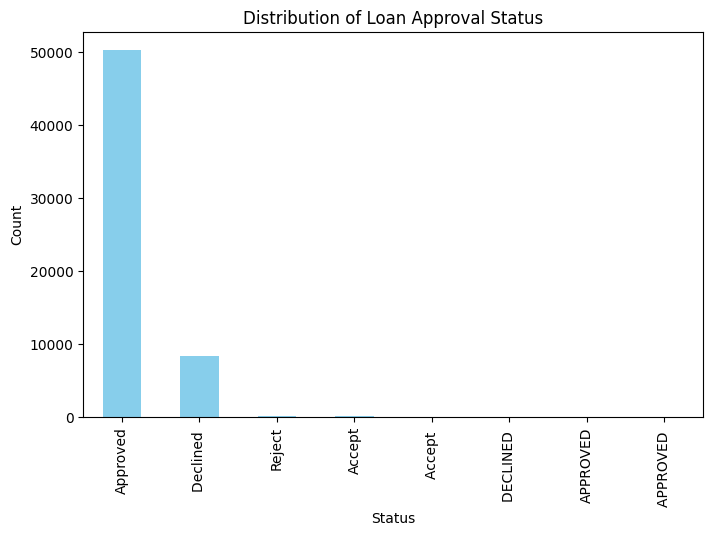

In [32]:
# Basic statistical description
print("Basic Statistical Description:")
display(df_retained.describe(include='all'))

# Variable scale types
print("\nVariable Scale Types:")
display(df_retained.dtypes)

# Plot distribution of target variable
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
df_retained['loan_approval_status'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Loan Approval Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [33]:

# Count all unique values in 'loan_approval_status'
status_counts = df['loan_approval_status'].value_counts().reset_index()
status_counts.columns = ['Loan Approval Status', 'Count']

# Sort by count in descending order
status_counts_sorted = status_counts.sort_values(by='Count', ascending=False)

# Display the table
print(status_counts_sorted.to_string(index=False))


Loan Approval Status  Count
            Approved  50210
           Declined    8268
              Reject     78
              Accept     58
             Accept      21
           DECLINED       4
            APPROVED      3
           APPROVED       2


**Task 3**


**3a – Investigate issues (Evidence)**


In [34]:
def banner(t):
    print("\n" + "="*20 + f" {t} " + "="*20)

# --- Missingness overview for retained inputs + target ---
cols_to_audit = [
    "age",
    "Education_Qualifications",
    "income",
    "home_ownership",
    "emplyment_length",
    "loan_intent",
    "loan_amount",
    "loan_interest_rate",
    "loan_income_ratio",
    "payment_default_on_file",
    "credit_history_length",
    "loan_approval_status",
    "Sex"  # for evidence only: shows ~99.6% missing
]

banner("Missingness (count)")
print(df[cols_to_audit].isna().sum().sort_values(ascending=False))

# --- Show label inconsistencies for key categoricals (top 20 values, uppercased) ---
for c in ["loan_approval_status", "payment_default_on_file", "Education_Qualifications", "home_ownership", "loan_intent", "Sex"]:
    if c in df.columns:
        banner(f"Value audit: {c}")
        print(df[c].astype(str).str.strip().str.upper().value_counts(dropna=False).head(20))

# --- Age: mixed types evidence (non-numeric becomes NaN) ---
banner("Age mixed types: non-numeric count (via coercion)")
print("age non-numeric (will coerce to NaN):", pd.to_numeric(df["age"], errors="coerce").isna().sum())

# --- Outlier counts via IQR (evidence) ---
def iqr_outlier_counts(s):
    s = pd.to_numeric(s, errors="coerce")
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    return int(((s < lower) | (s > upper)).sum()), (lower, upper)

banner("IQR outlier counts + bounds")
for col in ["income","emplyment_length","loan_amount","loan_income_ratio","credit_history_length"]:
    cnt, bounds = iqr_outlier_counts(df[col])
    print(f"{col}: outliers={cnt}, bounds={bounds}")

# --- Loan interest rate: missing + extreme evidence ---
lir = pd.to_numeric(df["loan_interest_rate"], errors="coerce")
banner("Loan interest rate missing + extremes")
print("Missing:", lir.isna().sum(), " | > 40%:", int((lir > 40).sum()), " | Max:", float(lir.max()))



==================== Missingness (count) ====================
Sex                         58424
loan_interest_rate             11
age                             6
payment_default_on_file         5
loan_approval_status            1
emplyment_length                0
home_ownership                  0
income                          0
Education_Qualifications        0
loan_income_ratio               0
loan_amount                     0
loan_intent                     0
credit_history_length           0
dtype: int64

==================== Value audit: loan_approval_status ====================
loan_approval_status
APPROVED    50215
DECLINED     8272
ACCEPT         79
REJECT         78
NAN             1
Name: count, dtype: int64

==================== Value audit: payment_default_on_file ====================
payment_default_on_file
N      49933
Y       8696
NO         7
NAN        5
YES        4
Name: count, dtype: int64

==================== Value audit: Education_Qualifications =============

In [35]:
# =========================
# Task (3b) – Implement mitigations (Cleaning Pipeline with BEFORE/AFTER prints)
# =========================
# df = raw.copy()

def banner(t):
    print("\n" + "="*20 + f" {t} " + "="*20)

def iqr_bounds(s):
    s = pd.to_numeric(s, errors="coerce")
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    return q1 - 1.5*iqr, q3 + 1.5*iqr

def iqr_outlier_count(s):
    low, up = iqr_bounds(s)
    s = pd.to_numeric(s, errors="coerce")
    return int(((s < low) | (s > up)).sum())

# --- Sex: ~99.6% missing -> Drop column (evidence) ---
banner("SEX: BEFORE drop")
print("NaN count:", df["Sex"].isna().sum(), "/", len(df))
print("Value counts (upper, head):")
print(df["Sex"].astype(str).str.strip().str.upper().value_counts(dropna=False).head())
df = df.drop(columns=["Sex"])

# --- Age: convert to numeric + median impute (robust to skew) ---
banner("AGE: convert to numeric + median impute")
age_extracted = df["age"].astype(str).str.extract(r"(\d+\.?\d*)", expand=False)
age_num = pd.to_numeric(age_extracted, errors="coerce")
print("Non-numeric/NaN BEFORE:", age_num.isna().sum())
age_med = age_num.median()
df["age"] = age_num.fillna(age_med)
print("Median used:", age_med, " | NaN AFTER:", df["age"].isna().sum())

# --- Loan interest rate: impute missing with median (robust to outliers) ---
banner("LOAN INTEREST RATE: median impute missing")
lir = pd.to_numeric(df["loan_interest_rate"], errors="coerce")
print("Missing BEFORE:", lir.isna().sum())
lir_med = lir.median()
df["loan_interest_rate"] = lir.fillna(lir_med)
print("Median used:", lir_med, " | Missing AFTER:", df["loan_interest_rate"].isna().sum())

# --- Payment default on file: normalize to {Y,N} + mode impute ---
banner("PAYMENT DEFAULT ON FILE: normalize + mode impute")
def map_yn(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().lower()
    if s in {"y","yes","1","true"}: return "Y"
    if s in {"n","no","0","false"}: return "N"
    return np.nan

print("Top BEFORE:\n", df["payment_default_on_file"].astype(str).str.strip().str.upper().value_counts(dropna=False).head(10))
mapped = df["payment_default_on_file"].apply(map_yn)
mode_val = mapped.mode(dropna=True)[0] if not mapped.mode(dropna=True).empty else "N"
df["payment_default_on_file"] = mapped.fillna(mode_val)
print("Mode used:", mode_val)
print("AFTER:\n", df["payment_default_on_file"].value_counts())

# --- Target: standardize to {Approved, Declined} + drop missing target ---
banner("TARGET loan_approval_status: standardize + drop missing")
def map_status(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().lower()
    if s in {"approved","accept","accepted","approve"}: return "Approved"
    if s in {"declined","reject","rejected","decline"}: return "Declined"
    return np.nan

print("Top BEFORE:\n", df["loan_approval_status"].astype(str).str.strip().str.upper().value_counts(dropna=False).head(10))
mapped_y = df["loan_approval_status"].apply(map_status)
print("Missing AFTER mapping:", mapped_y.isna().sum())
df = df.loc[mapped_y.notna()].copy()
df["loan_approval_status"] = mapped_y.loc[mapped_y.notna()]
print("AFTER:\n", df["loan_approval_status"].value_counts())

# --- Categorical cleanup: strip/uppercase and keep 'UNKNOWN' informative level ---
banner("EDUCATION QUALIFICATIONS: strip/uppercase + keep 'UNKNOWN'")
df["Education_Qualifications"] = (df["Education_Qualifications"]
                                  .astype(str).str.strip().str.upper()
                                  .replace({'': np.nan}).fillna("UNKNOWN"))
print(df["Education_Qualifications"].value_counts().head())

for c in ["home_ownership","loan_intent"]:
    banner(f"{c}: strip/uppercase + fill 'UNKNOWN'")
    df[c] = (df[c].astype(str).str.strip().str.upper()
             .replace({'': np.nan}).fillna("UNKNOWN"))
    print(df[c].value_counts().head())

# --- IQR clip outliers (income, emplyment_length, loan_amount, loan_income_ratio, credit_history_length) ---
banner("OUTLIERS: IQR-clip selected numeric features")
clip_cols = ["income","emplyment_length","loan_amount","loan_income_ratio","credit_history_length"]
print("BEFORE outlier counts:", {c: iqr_outlier_count(df[c]) for c in clip_cols})
for c in clip_cols:
    low, up = iqr_bounds(df[c])
    df[c] = pd.to_numeric(df[c], errors="coerce").clip(lower=low, upper=up)
print("AFTER outlier counts:", {c: iqr_outlier_count(df[c]) for c in clip_cols})

# --- Drop columns not for Part A classification ---
banner("DROP non-Part-A columns: id, max_allowed_loan, Credit_Application_Acceptance")
to_drop = ["id", "max_allowed_loan", "Credit_Application_Acceptance"]
df = df.drop(columns=to_drop)
print("Columns now:", list(df.columns))
print("Shape now:", df.shape)

# --- Save cleaned dataset for Part A modelling (Task 4 onward) ---
out_fn = "loan_partA_clean.csv"
df.to_csv(out_fn, index=False)
print("Saved:", out_fn)



==================== SEX: BEFORE drop ====================
NaN count: 58424 / 58645
Value counts (upper, head):
Sex
NAN    58424
M        126
F         95
Name: count, dtype: int64

==================== AGE: convert to numeric + median impute ====================
Non-numeric/NaN BEFORE: 9
Median used: 26.0  | NaN AFTER: 0

==================== LOAN INTEREST RATE: median impute missing ====================
Missing BEFORE: 11
Median used: 10.75  | Missing AFTER: 0

==================== PAYMENT DEFAULT ON FILE: normalize + mode impute ====================
Top BEFORE:
 payment_default_on_file
N      49933
Y       8696
NO         7
NAN        5
YES        4
Name: count, dtype: int64
Mode used: N
AFTER:
 payment_default_on_file
N    49945
Y     8700
Name: count, dtype: int64

==================== TARGET loan_approval_status: standardize + drop missing ====================
Top BEFORE:
 loan_approval_status
APPROVED    50215
DECLINED     8272
ACCEPT         79
REJECT         78
NAN           

**Task 4**

In [36]:
#new code
# ==========================================
# TASK 4 & 5: CATEGORICAL FEATURES ONLY
# ==========================================

# 1. Load the cleaned dataset
# Ensure you have run Task 3 first to create this file!
df = pd.read_csv("loan_partA_clean.csv")

# 2. Select STRICTLY Categorical Features + Target
cat_features = [
    'Education_Qualifications',
    'home_ownership',
    'loan_intent',
    'payment_default_on_file'
]
target = 'loan_approval_status'

X = df[cat_features]
y = df[target]

# 3. Encode Target
le = LabelEncoder()
y_encoded = le.fit_transform(y) # 0=Approved, 1=Declined
target_names = le.classes_

# 4. One-Hot Encode Categorical Features
X_encoded = pd.get_dummies(X, drop_first=True)

# 5. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# --- Task 4b Outputs ---
print("Feature Names:")
for col in X_encoded.columns:
    print(col)

print("Data Shape:", X_encoded.shape)

# 6. Build & Train Models
models = {
    "Naive Bayes": BernoulliNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
}

results_list = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate Metrics for "Declined" Class (Index 1)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    # Store in a list for the dataframe
    results_list.append({
        "Model": name,
        "Accuracy": report['accuracy'],
        "Recall (Declined)": report['1']['recall'],
        "Precision (Declined)": report['1']['precision'],
        "F1-Score (Declined)": report['1']['f1-score'],
        "AUC-ROC": roc_auc_score(y_test, y_prob)
    })

    # Optional: Print Confusion Matrix for Report Task 5a
    print(f"\n{name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

# 7. Create and Display Table
results_df = pd.DataFrame(results_list)
results_df.set_index("Model", inplace=True)

print("\n--- Task 5b: Model Performance Table ---")
print(results_df.round(3)) # Rounded to 3 decimal places for cleanliness


Feature Names:
Education_Qualifications_COLLEGE
Education_Qualifications_HIGH SCHOOL
Education_Qualifications_HIGHER EDUCATION
Education_Qualifications_UNKNOWN
home_ownership_OTHER
home_ownership_OWN
home_ownership_RENT
loan_intent_EDUCATION
loan_intent_HOMEIMPROVEMENT
loan_intent_MEDICAL
loan_intent_PERSONAL
loan_intent_VENTURE
payment_default_on_file_Y
Data Shape: (58644, 13)

Naive Bayes Confusion Matrix:
[[14821   268]
 [ 2259   246]]

Logistic Regression Confusion Matrix:
[[15089     0]
 [ 2463    42]]

Random Forest Confusion Matrix:
[[7766 7323]
 [ 362 2143]]

--- Task 5b: Model Performance Table ---
                     Accuracy  Recall (Declined)  Precision (Declined)  \
Model                                                                    
Naive Bayes             0.856              0.098                 0.479   
Logistic Regression     0.860              0.017                 1.000   
Random Forest           0.563              0.855                 0.226   

              

**Task 5**

**5a**

In [37]:
# --- PART 1: Initial Model Evaluation (Task 5a & 5b) ---
print("--- Task 5a & 5b: Initial Evaluation ---")

# perform evaluation on the models built in Task 4

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\nModel: {name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


--- Task 5a & 5b: Initial Evaluation ---

Model: Naive Bayes
Confusion Matrix:
[[14821   268]
 [ 2259   246]]

Model: Logistic Regression
Confusion Matrix:
[[15089     0]
 [ 2463    42]]

Model: Random Forest
Confusion Matrix:
[[7766 7323]
 [ 362 2143]]


In [38]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\nModel: {name}")

    # Detailed report for the 'Declined' class (1)
    report = classification_report(y_test, y_pred, output_dict=True)
    print(f"Recall (Declined):    {report['1']['recall']:.3f}")
    print(f"Precision (Declined): {report['1']['precision']:.3f}")
    print(f"F1-Score (Declined):  {report['1']['f1-score']:.3f}")
    print(f"AUC-ROC:              {roc_auc_score(y_test, y_prob):.3f}")


Model: Naive Bayes
Recall (Declined):    0.098
Precision (Declined): 0.479
F1-Score (Declined):  0.163
AUC-ROC:              0.741

Model: Logistic Regression
Recall (Declined):    0.017
Precision (Declined): 1.000
F1-Score (Declined):  0.033
AUC-ROC:              0.743

Model: Random Forest
Recall (Declined):    0.855
Precision (Declined): 0.226
F1-Score (Declined):  0.358
AUC-ROC:              0.752


**5D**

In [39]:
# ==========================================
# TASK 5d: OVERFITTING/UNDERFITTING CHECK
# ==========================================
from sklearn.metrics import roc_auc_score, classification_report
import pandas as pd

# 1. Select the Best Model (Random Forest)
# We use the model already trained in the previous step
best_model_name = "Random Forest"
best_model = models[best_model_name]

print(f"--- Task 5d Evidence: Train vs. Test Comparison ({best_model_name}) ---")

# 2. Get Predictions for Training Data (to see if it memorized the data)
y_train_pred = best_model.predict(X_train)
y_train_prob = best_model.predict_proba(X_train)[:, 1]

# 3. Get Predictions for Test Data (to see how it generalizes)
y_test_pred = best_model.predict(X_test)
y_test_prob = best_model.predict_proba(X_test)[:, 1]

# 4. Calculate Metrics
# Training Metrics
train_auc = roc_auc_score(y_train, y_train_prob)
train_report = classification_report(y_train, y_train_pred, output_dict=True, zero_division=0)

# Test Metrics
test_auc = roc_auc_score(y_test, y_test_prob)
test_report = classification_report(y_test, y_test_pred, output_dict=True, zero_division=0)

# 5. Create Comparison Table (Focusing on 'Declined' Class [1])
comparison_data = {
    'Metric': ['AUC-ROC', 'Recall (Declined)', 'Precision (Declined)', 'F1-Score (Declined)'],
    'Training Score': [
        train_auc,
        train_report['1']['recall'],
        train_report['1']['precision'],
        train_report['1']['f1-score']
    ],
    'Test Score': [
        test_auc,
        test_report['1']['recall'],
        test_report['1']['precision'],
        test_report['1']['f1-score']
    ]
}

df_fit_check = pd.DataFrame(comparison_data)
df_fit_check['Difference'] = df_fit_check['Training Score'] - df_fit_check['Test Score']

# 6. Display Results
print(df_fit_check.round(3))

# 7. Automated Conclusion Logic
print("\n--- Conclusion ---")
auc_gap = train_auc - test_auc

if train_auc > 0.95 and auc_gap > 0.10:
    print("Diagnosis: OVERFITTING (High Variance)")
    print("Reason: Training score is much higher than Test score. The model memorized the training data.")
elif train_auc < 0.80 and test_auc < 0.80:
    print("Diagnosis: UNDERFITTING (High Bias)")
    print("Reason: Both Training and Test scores are low. The model is too simple (needs numerical features).")
else:
    print("Diagnosis: GOOD FIT")
    print("Reason: Scores are balanced and the gap between Train/Test is small.")

--- Task 5d Evidence: Train vs. Test Comparison (Random Forest) ---
                 Metric  Training Score  Test Score  Difference
0               AUC-ROC           0.760       0.752       0.008
1     Recall (Declined)           0.861       0.855       0.005
2  Precision (Declined)           0.229       0.226       0.002
3   F1-Score (Declined)           0.361       0.358       0.003

--- Conclusion ---
Diagnosis: UNDERFITTING (High Bias)
Reason: Both Training and Test scores are low. The model is too simple (needs numerical features).


**5E**

Performs the hyperparameter tuning on the best model, Random Forest, using GridSearchCV

In [40]:
# ==========================================
# TASK 5e: HYPERPARAMETER TUNING
# ==========================================

# 1. Setup Data (Categorical Only)
df = pd.read_csv("loan_partA_clean.csv")
cat_features = ['Education_Qualifications', 'home_ownership', 'loan_intent', 'payment_default_on_file']
X = pd.get_dummies(df[cat_features], drop_first=True)
y = LabelEncoder().fit_transform(df['loan_approval_status'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 2. Define Tuning Parameters
# We tune 'n_estimators' (trees), 'max_depth' (complexity), and 'min_samples_leaf'
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 4]
}

print("--- Task 5e(i) Evidence ---")
print("Cross-Validation Folds used: cv=5")

# 3. Run Grid Search
# We optimize for 'f1' (weighted) to balance Precision and Recall
rf_base = RandomForestClassifier(random_state=42, class_weight='balanced')
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid,
                           cv=5, scoring='f1', n_jobs=-1)

print("Tuning model... (this may take a moment)")
grid_search.fit(X_train, y_train)

# 4. Get Results
best_rf = grid_search.best_estimator_

print("\n--- Task 5e(ii) Evidence: Best Hyperparameters ---")
print("Original: {'n_estimators': 100, 'max_depth': None, 'min_samples_leaf': 1}")
print(f"Tuned:    {grid_search.best_params_}")

# 5. Compare Performance
y_pred_tuned = best_rf.predict(X_test)
y_prob_tuned = best_rf.predict_proba(X_test)[:, 1]

# Get stats for Initial Model (Default params)
rf_default = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_default.fit(X_train, y_train)
y_pred_def = rf_default.predict(X_test)
y_prob_def = rf_default.predict_proba(X_test)[:, 1]

print("\n--- Task 5e(iii) Evidence: Confusion Matrices ---")
print("Before Tuning:")
print(confusion_matrix(y_test, y_pred_def))
print("\nAfter Tuning:")
print(confusion_matrix(y_test, y_pred_tuned))

# 6. Generate Metrics Table
rep_def = classification_report(y_test, y_pred_def, output_dict=True)
rep_tuned = classification_report(y_test, y_pred_tuned, output_dict=True)

print("\n--- Task 5e(iv) Evidence: Performance Comparison (Declined Class) ---")
data = {
    'Metric': ['Recall', 'Precision', 'F1-Score', 'AUC-ROC'],
    'Before Tuning': [
        rep_def['1']['recall'], rep_def['1']['precision'],
        rep_def['1']['f1-score'], roc_auc_score(y_test, y_prob_def)
    ],
    'After Tuning': [
        rep_tuned['1']['recall'], rep_tuned['1']['precision'],
        rep_tuned['1']['f1-score'], roc_auc_score(y_test, y_prob_tuned)
    ]
}
print(pd.DataFrame(data).round(3))

--- Task 5e(i) Evidence ---
Cross-Validation Folds used: cv=5
Tuning model... (this may take a moment)

--- Task 5e(ii) Evidence: Best Hyperparameters ---
Original: {'n_estimators': 100, 'max_depth': None, 'min_samples_leaf': 1}
Tuned:    {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 100}

--- Task 5e(iii) Evidence: Confusion Matrices ---
Before Tuning:
[[7766 7323]
 [ 362 2143]]

After Tuning:
[[7766 7323]
 [ 362 2143]]

--- Task 5e(iv) Evidence: Performance Comparison (Declined Class) ---
      Metric  Before Tuning  After Tuning
0     Recall          0.855         0.855
1  Precision          0.226         0.226
2   F1-Score          0.358         0.358
3    AUC-ROC          0.752         0.752


# **Part B**

**Task 1**

In [41]:
# ==========================================
# PART B - TASK 1: DOMAIN UNDERSTANDING
# ==========================================

# 1. Load Original Data
df = pd.read_csv('loan_approval_dataset.csv',low_memory=False)
df.columns = df.columns.str.strip()  # Clean column names

# 2. Filter for Approved Clients Only
# The business goal is to estimate loan amounts for *approved* clients.
# filter for 'Approved'
df_regression = df[df['loan_approval_status'].str.strip().str.lower().isin(['approved', 'accept'])].copy()

# 3. Drop Irrelevant Columns
# - 'id': Not predictive
# - 'Sex': Removed due to high missingness (as established in Part A)
# - 'loan_approval_status': It is now constant (all are 'Approved'), so it's useless as a feature.
# - 'Credit_Application_Acceptance': Redundant target leakage.
cols_to_drop = ['id', 'Sex', 'loan_approval_status', 'Credit_Application_Acceptance']
df_regression = df_regression.drop(columns=cols_to_drop, errors='ignore')

# --- Task 1 Evidence Outputs ---
print("--- Part B Task 1 Evidence ---")
print(f"Dimensions of Retained Data Subset: {df_regression.shape}")
print("\nList of Features for Regression:")
for col in df_regression.columns:
    print(col)

--- Part B Task 1 Evidence ---
Dimensions of Retained Data Subset: (50294, 12)

List of Features for Regression:
age
Education_Qualifications
income
home_ownership
emplyment_length
loan_intent
loan_amount
loan_interest_rate
loan_income_ratio
payment_default_on_file
credit_history_length
max_allowed_loan


**Task 2**

In [42]:
# ==========================================
# PART B - TASK 2: VISUALIZATIONS
# ==========================================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Note: This assumes 'df_regression' is already created from your previous step.

# --- 1. Data Cleaning for Plotting ---
# Force numeric columns to numeric, coercing errors (like "Twenty Seven") to NaN
numeric_cols_to_clean = ['age', 'loan_interest_rate']
for col in numeric_cols_to_clean:
    if col in df_regression.columns:
        df_regression[col] = pd.to_numeric(df_regression[col], errors='coerce')
        # Fill NaNs with median for visualization purposes
        df_regression[col] = df_regression[col].fillna(df_regression[col].median())

# Clean Categorical Strings (standardize case and remove spaces)
cat_cols = df_regression.select_dtypes(include='object').columns
for col in cat_cols:
    df_regression[col] = df_regression[col].astype(str).str.strip().str.upper()


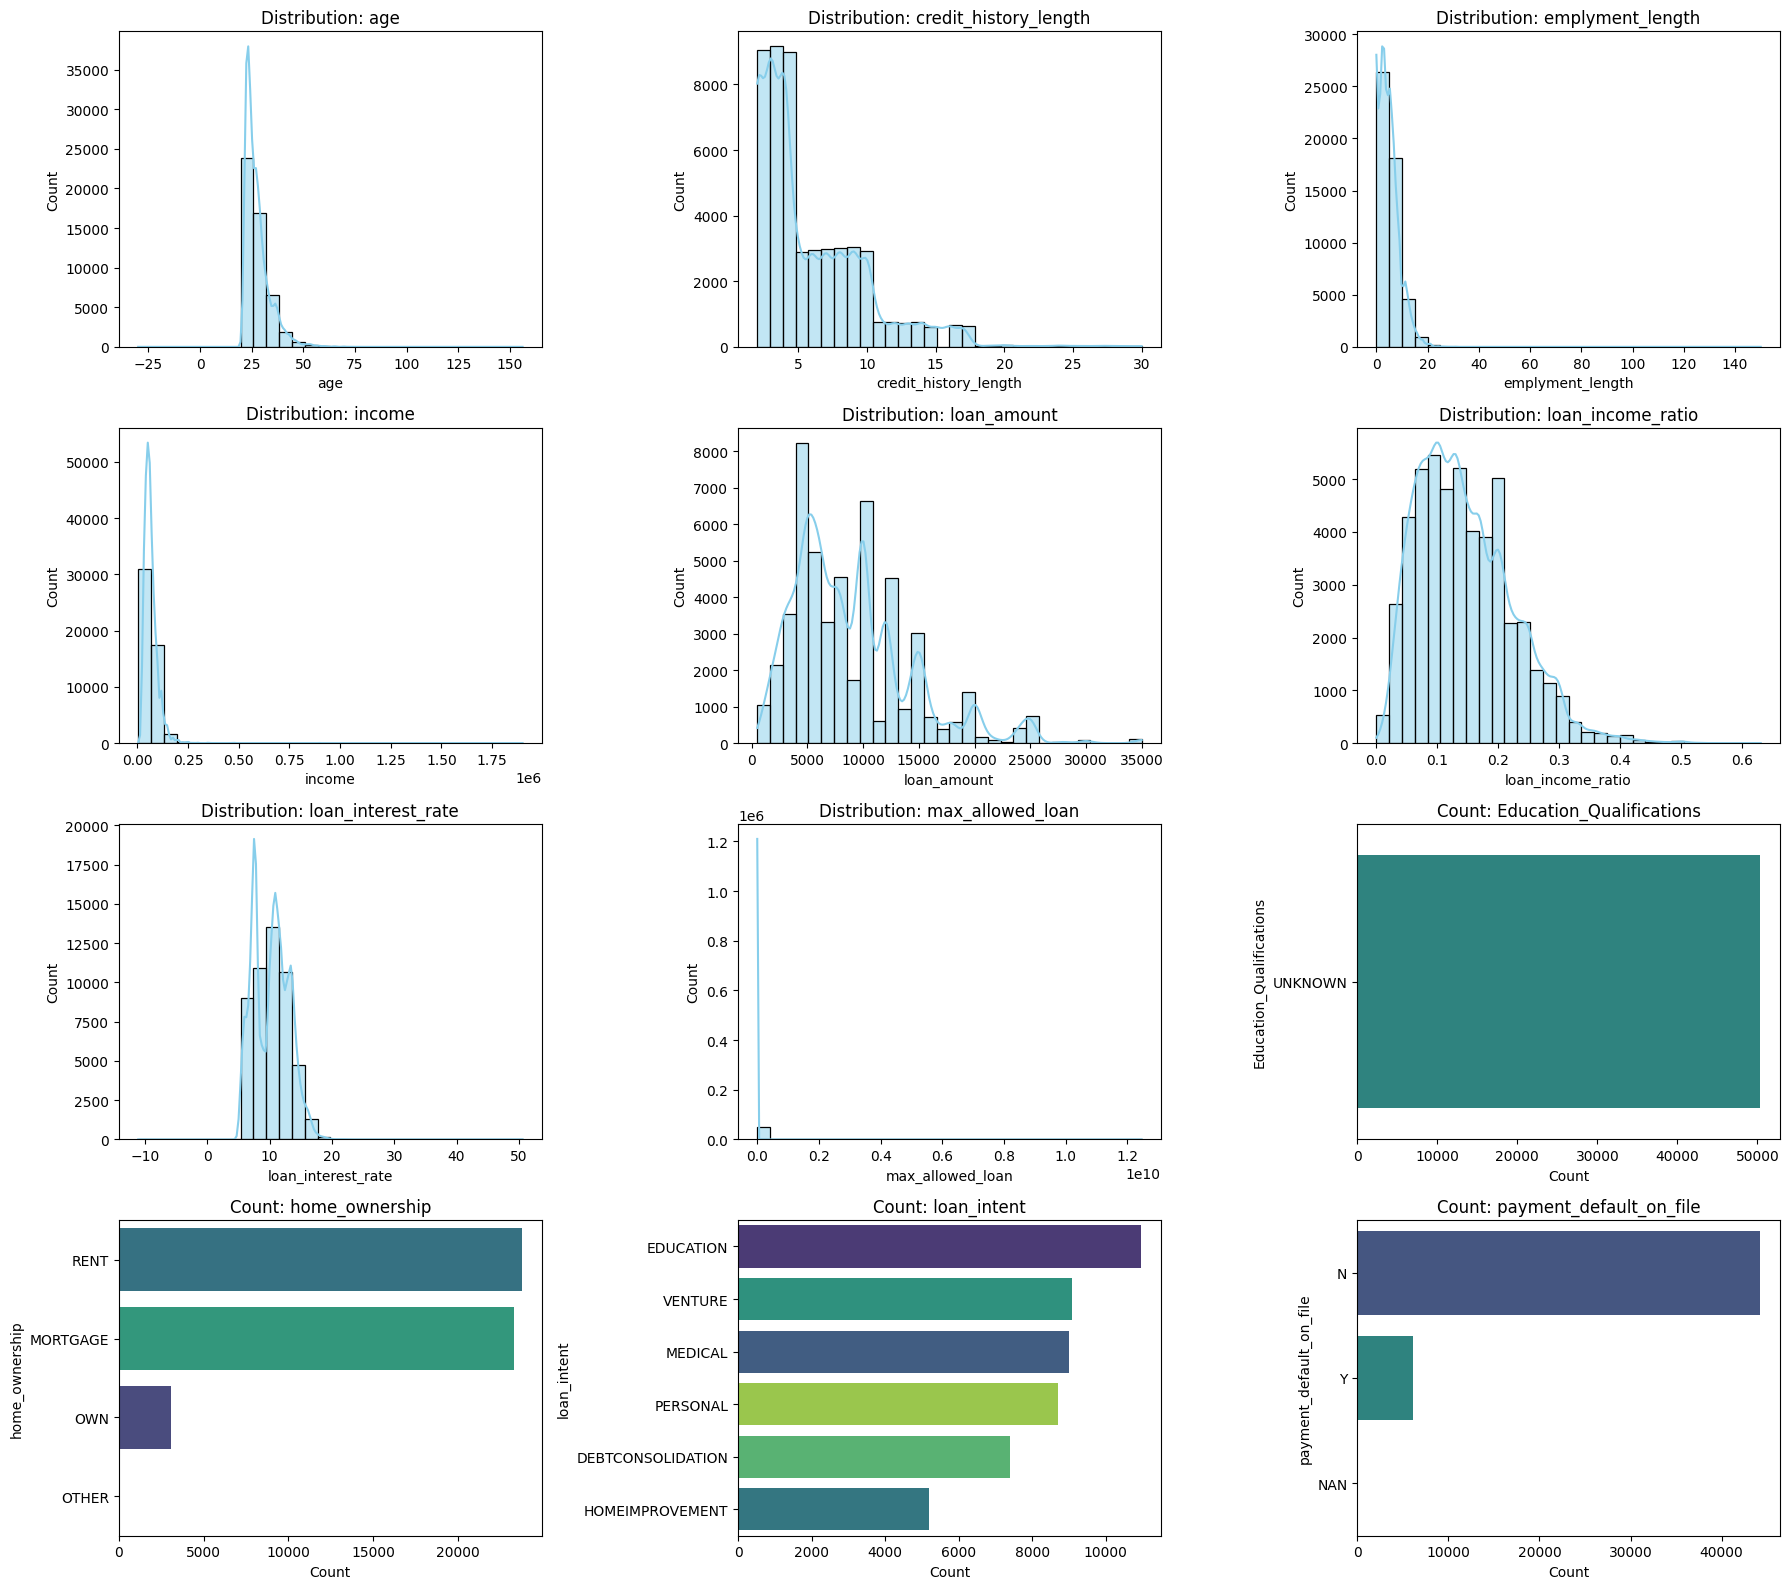

In [43]:
# --- 2. Generate Plots ---
# Separate features by type
num_features = df_regression.select_dtypes(include=[np.number]).columns.tolist()
cat_features = df_regression.select_dtypes(include=['object']).columns.tolist()

# Combine sorted lists so plots are organized
all_cols = sorted(num_features) + sorted(cat_features)

# Calculate grid size
total_cols = len(all_cols)
n_cols = 3
n_rows = (total_cols + n_cols - 1) // n_cols

# Create Figure
plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(all_cols):
    plt.subplot(n_rows, n_cols, i + 1)

    if col in num_features:
        # Histogram for Numerical Data
        sns.histplot(df_regression[col], kde=True, color='skyblue', bins=30)
        plt.title(f'Distribution: {col}')
        plt.xlabel(col)
    else:
        # Bar Plot for Categorical Data (ordered by count)
        count_order = df_regression[col].value_counts().index
        sns.countplot(y=df_regression[col], order=count_order, palette='viridis', hue=df_regression[col], legend=False)
        plt.title(f'Count: {col}')
        plt.xlabel('Count')
        plt.ylabel(col)

plt.tight_layout()
plt.show()

**Task 3**

**3A**

In [44]:
# ==========================================
# PART B - TASK 3: DATA PREPROCESSING (SCALING EVIDENCE)
# ==========================================
import pandas as pd

# Ensure df_regression exists (from Task 1)
# Calculate Descriptive Statistics
# We transpose (.T) the output so features are rows, making it easier to read in a report
stats = df_regression.describe().T[['mean', 'std', 'min', 'max']]

print("--- Task 3a Evidence: Descriptive Statistics ---")
print(stats.round(2))

--- Task 3a Evidence: Descriptive Statistics ---
                            mean          std         min           max
age                        27.55         6.01      -30.00  1.560000e+02
income                  66674.00     39313.95     4200.00  1.900000e+06
emplyment_length            4.87         4.00        0.00  1.500000e+02
loan_amount              8888.99      5328.36      500.00  3.500000e+04
loan_interest_rate         10.26         2.83      -11.14  5.060000e+01
loan_income_ratio           0.15         0.08        0.00  6.300000e-01
credit_history_length       5.82         4.00        2.00  3.000000e+01
max_allowed_loan       329236.77  55595002.96 -2426900.00  1.246799e+10


**Task 4**

In [45]:
# ==========================================
# PART B - TASK 4: DATA PREPARATION & MODELLING
# ==========================================

# 1. Clean Data for Modelling
# -------------------------------------------------------
# We work with a copy of the filtered data from Task 1
df_model = df_regression.copy()

# A. Clean Numerical Columns (Handle mixed types/missing)
# Force 'age' to numeric, coercing errors (like "Twenty Seven") to NaN
df_model['age'] = pd.to_numeric(df_model['age'], errors='coerce')
# Fill missing values with median
df_model['age'] = df_model['age'].fillna(df_model['age'].median())
df_model['loan_interest_rate'] = df_model['loan_interest_rate'].fillna(df_model['loan_interest_rate'].median())

# B. Clean Categorical Strings (Standardize case/spaces)
cat_cols = df_model.select_dtypes(include='object').columns
for c in cat_cols:
    df_model[c] = df_model[c].astype(str).str.strip().str.upper()

# C. Remove Invalid Targets
# We cannot train on negative loan amounts
df_model = df_model[df_model['max_allowed_loan'] > 0].copy()

print(f"Data cleaned. Rows ready for modelling: {len(df_model)}")

# 2. Define Feature Sets
# -------------------------------------------------------
# Numeric Features (for Model 1: DT1)
numeric_features = ['age', 'income', 'emplyment_length', 'loan_amount',
                    'loan_interest_rate', 'loan_income_ratio', 'credit_history_length']

# All Features (for Model 2: DT2)
# We define the categorical columns to encode
cols_to_encode = ['Education_Qualifications', 'home_ownership', 'loan_intent', 'payment_default_on_file']

# Target Variable
y = df_model['max_allowed_loan']

# 3. Prepare Input Matrices (X)
# -------------------------------------------------------
# X1: Numeric Only
X1 = df_model[numeric_features]

# X2: All Features (requires One-Hot Encoding for categoricals)
X2 = pd.get_dummies(df_model[numeric_features + cols_to_encode], columns=cols_to_encode, drop_first=True)

# 4. Split Data (80:20 Split)
# -------------------------------------------------------
# random_state=42 to ensure reproducibility (Question 4b.i)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# 5. Train Models
# -------------------------------------------------------
print("\nTraining Models...")
dt1 = DecisionTreeRegressor(random_state=42)
dt1.fit(X1_train, y1_train)
print("Model 1 (DT1 - Numeric) Trained.")

dt2 = DecisionTreeRegressor(random_state=42)
dt2.fit(X2_train, y2_train)
print("Model 2 (DT2 - All Features) Trained.")

# 6. Evidence Outputs for Report
# -------------------------------------------------------
print("\n--- Task 4b(i) Evidence: Reproducibility ---")
print("Code used: train_test_split(..., test_size=0.2, random_state=42)")

print("\n--- Task 4b(ii) Evidence: Dimensions ---")
print(f"Training Set Shape (Rows, Cols): {X2_train.shape}")
print(f"Test Set Shape (Rows, Cols):     {X2_test.shape}")

print("\n--- Task 4b(ii) Evidence: Feature Lists ---")
print(f"Model 1 Features ({len(X1.columns)}):")
for col in X1.columns:
    print(col)
# print(list(X1.columns))

print(f"\nModel 2 Features ({len(X2.columns)} - First 10 shown):")
for col in X2.columns:
    print(col)
# print(list(X2.columns)[:10])

Data cleaned. Rows ready for modelling: 50291

Training Models...
Model 1 (DT1 - Numeric) Trained.
Model 2 (DT2 - All Features) Trained.

--- Task 4b(i) Evidence: Reproducibility ---
Code used: train_test_split(..., test_size=0.2, random_state=42)

--- Task 4b(ii) Evidence: Dimensions ---
Training Set Shape (Rows, Cols): (40232, 17)
Test Set Shape (Rows, Cols):     (10059, 17)

--- Task 4b(ii) Evidence: Feature Lists ---
Model 1 Features (7):
age
income
emplyment_length
loan_amount
loan_interest_rate
loan_income_ratio
credit_history_length

Model 2 Features (17 - First 10 shown):
age
income
emplyment_length
loan_amount
loan_interest_rate
loan_income_ratio
credit_history_length
home_ownership_OTHER
home_ownership_OWN
home_ownership_RENT
loan_intent_EDUCATION
loan_intent_HOMEIMPROVEMENT
loan_intent_MEDICAL
loan_intent_PERSONAL
loan_intent_VENTURE
payment_default_on_file_NAN
payment_default_on_file_Y


**Task 5**

--- Task 5a Evidence: Test Scores Table ---
                                 MSE           MAE      R-Square
Model 1 (Numeric)       2.782168e+08  1.575855e+03  9.092134e-01
Model 2 (All Features)  3.090709e+16  2.480606e+06 -1.008548e+07
------------------------------

--- Task 5d: Training Pruned Model (Depth=4) ---
Pruned Model R2:  -134476.0929
Unpruned (DT2) R2: -10085479.8679
Performance Change: 9951003.7750


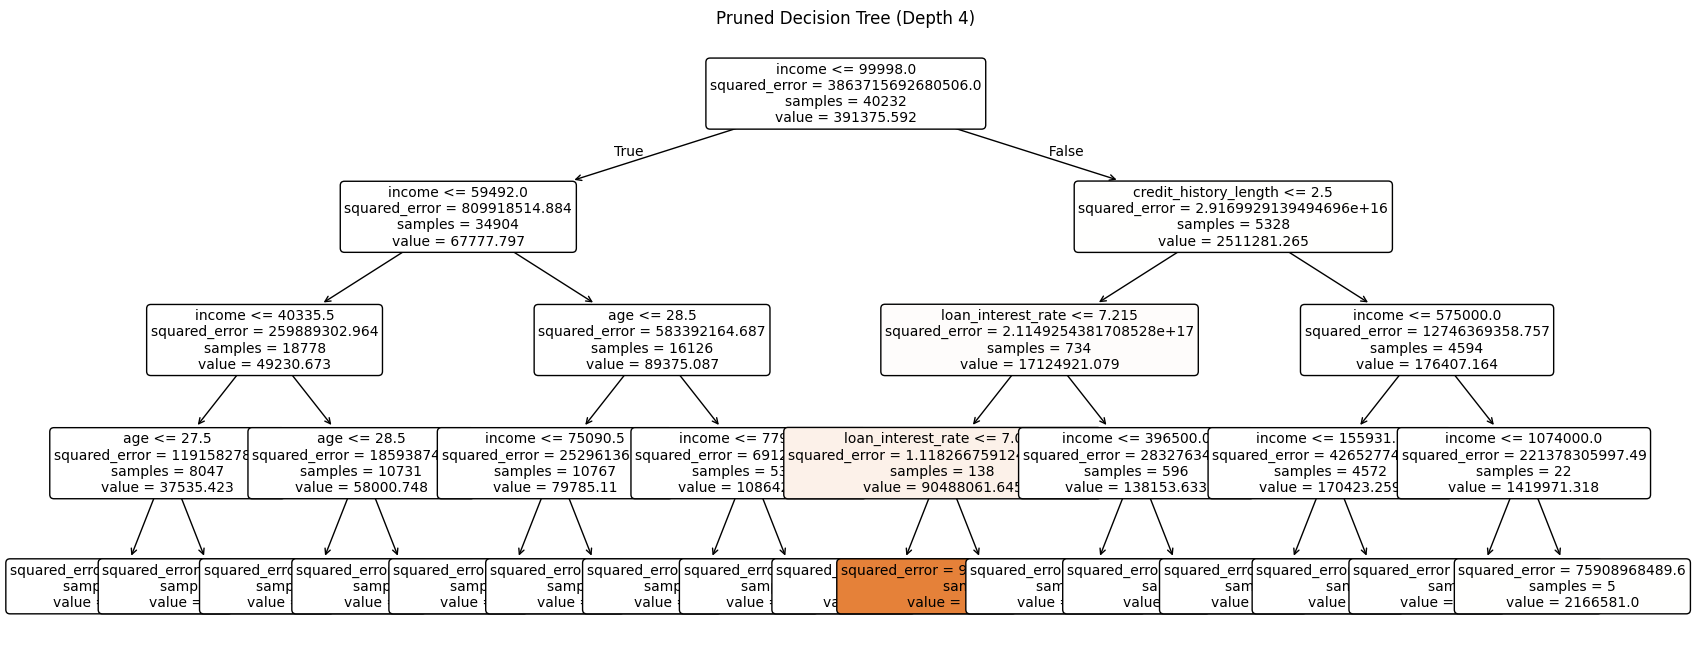

In [47]:
# ==========================================
# PART B - TASK 5: COMPLETE EVALUATION (Fix)
# ==========================================
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import plot_tree, DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd

# --- RE-CALCULATE SCORES (Fixing the NameError) ---
# This section generates the "Grid" for Task 5a
def get_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R-Square": r2_score(y_test, y_pred)
    }

# Calculate scores for the models built in Task 4b
results_dt1 = get_metrics(dt1, X1_test, y1_test)
results_dt2 = get_metrics(dt2, X2_test, y2_test)

# --- 1. Task 5a: The "Grid" (Results Table) ---
print("--- Task 5a Evidence: Test Scores Table ---")
results_df = pd.DataFrame({
    "Model 1 (Numeric)": results_dt1,
    "Model 2 (All Features)": results_dt2
}).T # Transpose for cleaner look

# Display the table to copy into your report
print(results_df)
print("-" * 30)

# --- 2. Task 5d: Pruning & Comparison ---
# Now 'results_dt2' is defined, so this will work!

print("\n--- Task 5d: Training Pruned Model (Depth=4) ---")
# Identify best features from Model 2
best_features = list(X2.columns)

# Train Pruned
dt_pruned = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_pruned.fit(X2_train, y2_train) # Using Model 2 data

# Evaluate Pruned
y_pred_pruned = dt_pruned.predict(X2_test)
mse_pruned = mean_squared_error(y2_test, y_pred_pruned)
r2_pruned = r2_score(y2_test, y_pred_pruned)

print(f"Pruned Model R2:  {r2_pruned:.4f}")
print(f"Unpruned (DT2) R2: {results_dt2['R-Square']:.4f}")
print(f"Performance Change: {r2_pruned - results_dt2['R-Square']:.4f}")

# Plot the Tree
plt.figure(figsize=(20, 8))
plot_tree(dt_pruned, feature_names=best_features, filled=True, fontsize=10, rounded=True)
plt.title("Pruned Decision Tree (Depth 4)")
plt.show()

In [49]:
# ==========================================
# TASK 5e: PREDICTION
# ==========================================

# 1. Define the missing lists explicitly
numeric_features = ['age', 'income', 'emplyment_length', 'loan_amount',
                    'loan_interest_rate', 'loan_income_ratio', 'credit_history_length']

categorical_cols = ['Education_Qualifications', 'home_ownership', 'loan_intent', 'payment_default_on_file']

# 2. Client Raw Data
client_data = {
    'age': 56,
    'income': 57000,
    'emplyment_length': 15,
    'loan_amount': 25700,
    'loan_interest_rate': 23.0,
    'loan_income_ratio': 0.10,
    'credit_history_length': 35,
    # Categoricals
    'Education_Qualifications': 'UNKNOWN',
    'home_ownership': 'RENT',
    'loan_intent': 'MEDICAL',
    'payment_default_on_file': 'N'
}

# 3. Create DataFrame with same columns as Training Data
# (We use 'best_features' from the previous step. If that variable is lost,
# we can use dt_pruned.feature_names_in_ if using scikit-learn v1.0+)
try:
    # Try to get features from the trained model directly
    model_features = dt_pruned.feature_names_in_
except:
    # Fallback: Use the variable from previous code block
    model_features = best_features

# Initialize Client DF with 0s
client_df = pd.DataFrame(0, index=[0], columns=model_features)

# 4. Fill Data
# Fill Numeric
for col in numeric_features:
    if col in client_data:
        client_df[col] = client_data[col]

# Fill Categorical (One-Hot Logic)
for col, val in client_data.items():
    if col in categorical_cols:
        # Construct dummy column name (e.g., "home_ownership_RENT")
        dummy_col = f"{col}_{val}"
        if dummy_col in client_df.columns:
            client_df[dummy_col] = 1

# 5. Predict
pred_value = dt_pruned.predict(client_df)[0]
print(f"\n--- Task 5e Result ---")
print(f"Predicted Maximum Loan Amount: £{pred_value:,.2f}")


--- Task 5e Result ---
Predicted Maximum Loan Amount: £72,240.41
